In [1]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 다중 회귀분석

In [3]:
data = pd.read_csv('./final/(0425)그룹화 최종.csv', index_col=0)

In [4]:
data

,qty,1kg price,temp,temp_sc,qty_sc
date,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446


In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [17]:
data[['1kg price_sc']] =  scale.fit_transform(data[['1kg price']])

In [18]:
from sklearn.model_selection import train_test_split
x = data[['temp_sc','qty_sc']]
y = data[['1kg price_sc']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [31]:
y_pred = mlr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test,y_pred)))

MSE : 0.945, RMSE : 0.972
Variance Score : 0.102


In [32]:
data

,qty,1kg price,temp,temp_sc,qty_sc,1kg price_sc
date,,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525,-1.123396
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461,-1.350797
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063,-1.272144
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343,-1.526086
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614,-1.305588
...,...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510,-1.262234
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428,-0.803817
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446,-0.015236


# 다항회귀분석

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='qty_sc', ylabel='1kg price_sc'>

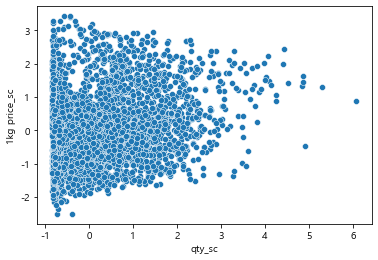

In [27]:
sns.scatterplot(x='qty_sc',y='1kg price_sc', data = data)

<AxesSubplot:xlabel='temp_sc', ylabel='1kg price_sc'>

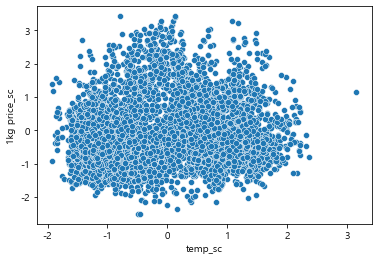

In [28]:
sns.scatterplot(x='temp_sc',y='1kg price_sc', data = data)

In [29]:
data

,qty,1kg price,temp,temp_sc,qty_sc,1kg price_sc
date,,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525,-1.123396
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461,-1.350797
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063,-1.272144
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343,-1.526086
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614,-1.305588
...,...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510,-1.262234
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428,-0.803817
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446,-0.015236


In [30]:
corr = data.corr(method = 'pearson')
corr

,qty,1kg price,temp,temp_sc,qty_sc,1kg price_sc
qty,1.000000,0.241096,-0.553020,-0.553020,1.000000,0.241096
1kg price,0.241096,1.000000,0.048214,0.048214,0.241096,1.000000
temp,-0.553020,0.048214,1.000000,1.000000,-0.553020,0.048214
temp_sc,-0.553020,0.048214,1.000000,1.000000,-0.553020,0.048214
qty_sc,1.000000,0.241096,-0.553020,-0.553020,1.000000,0.241096
1kg price_sc,0.241096,1.000000,0.048214,0.048214,0.241096,1.000000
